In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [17]:
data = pd.read_pickle('../data/aus_weather_cln.pkl')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,13.2,12.8,0.073030,44.0,0.062650,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,1.2,6.3,0.061240,44.0,0.059109,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,3.2,7.8,0.067118,46.0,0.062650,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,7.0,4.1,0.052887,24.0,0.068720,...,45.0,16.0,1017.6,1012.8,2.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,7.4,10.1,0.073030,41.0,0.058305,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,2.2,11.5,0.068101,31.0,0.068720,...,51.0,24.0,1024.6,1020.3,1.0,7.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,2.8,10.9,0.049237,22.0,0.068720,...,56.0,21.0,1023.5,1019.1,8.0,4.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,7.8,6.1,0.069057,37.0,0.068720,...,53.0,24.0,1021.0,1016.8,7.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,9.2,8.7,0.069545,28.0,0.067599,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
data[['RainToday', 'RainTomorrow']]

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [20]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Quarter
0,2008-12-01,Albury,13.4,22.900000,0.6,13.2,12.8,0.073030,44.0,0.062650,...,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,4
1,2008-12-02,Albury,7.4,25.100000,0.0,1.2,6.3,0.061240,44.0,0.059109,...,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,4
2,2008-12-03,Albury,12.9,25.700000,0.0,3.2,7.8,0.067118,46.0,0.062650,...,1008.7,1.0,2.0,21.0,23.2,0,0,2008,12,4
3,2008-12-04,Albury,9.2,28.000000,0.0,7.0,4.1,0.052887,24.0,0.068720,...,1012.8,2.0,7.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.300000,1.0,7.4,10.1,0.073030,41.0,0.058305,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,2.2,11.5,0.068101,31.0,0.068720,...,1020.3,1.0,7.0,10.1,22.4,0,0,2017,6,2
145456,2017-06-22,Uluru,3.6,25.300000,0.0,2.8,10.9,0.049237,22.0,0.068720,...,1019.1,8.0,4.0,10.9,24.5,0,0,2017,6,2
145457,2017-06-23,Uluru,5.4,26.900000,0.0,7.8,6.1,0.069057,37.0,0.068720,...,1016.8,7.0,0.0,12.5,26.1,0,0,2017,6,2
145458,2017-06-24,Uluru,7.8,27.000000,0.0,9.2,8.7,0.069545,28.0,0.067599,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,2


In [22]:
data.set_index('Date', inplace=True)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,0.6,13.2,12.8,0.073030,44.0,0.062650,0.062876,...,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,4
2008-12-02,Albury,7.4,25.100000,0.0,1.2,6.3,0.061240,44.0,0.059109,0.067221,...,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,4
2008-12-03,Albury,12.9,25.700000,0.0,3.2,7.8,0.067118,46.0,0.062650,0.067221,...,1008.7,1.0,2.0,21.0,23.2,0,0,2008,12,4
2008-12-04,Albury,9.2,28.000000,0.0,7.0,4.1,0.052887,24.0,0.068720,0.059831,...,1012.8,2.0,7.0,18.1,26.5,0,0,2008,12,4
2008-12-05,Albury,17.5,32.300000,1.0,7.4,10.1,0.073030,41.0,0.058305,0.060924,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,0.0,2.2,11.5,0.068101,31.0,0.068720,0.055706,...,1020.3,1.0,7.0,10.1,22.4,0,0,2017,6,2
2017-06-22,Uluru,3.6,25.300000,0.0,2.8,10.9,0.049237,22.0,0.068720,0.062959,...,1019.1,8.0,4.0,10.9,24.5,0,0,2017,6,2
2017-06-23,Uluru,5.4,26.900000,0.0,7.8,6.1,0.069057,37.0,0.068720,0.062876,...,1016.8,7.0,0.0,12.5,26.1,0,0,2017,6,2


## Distributions

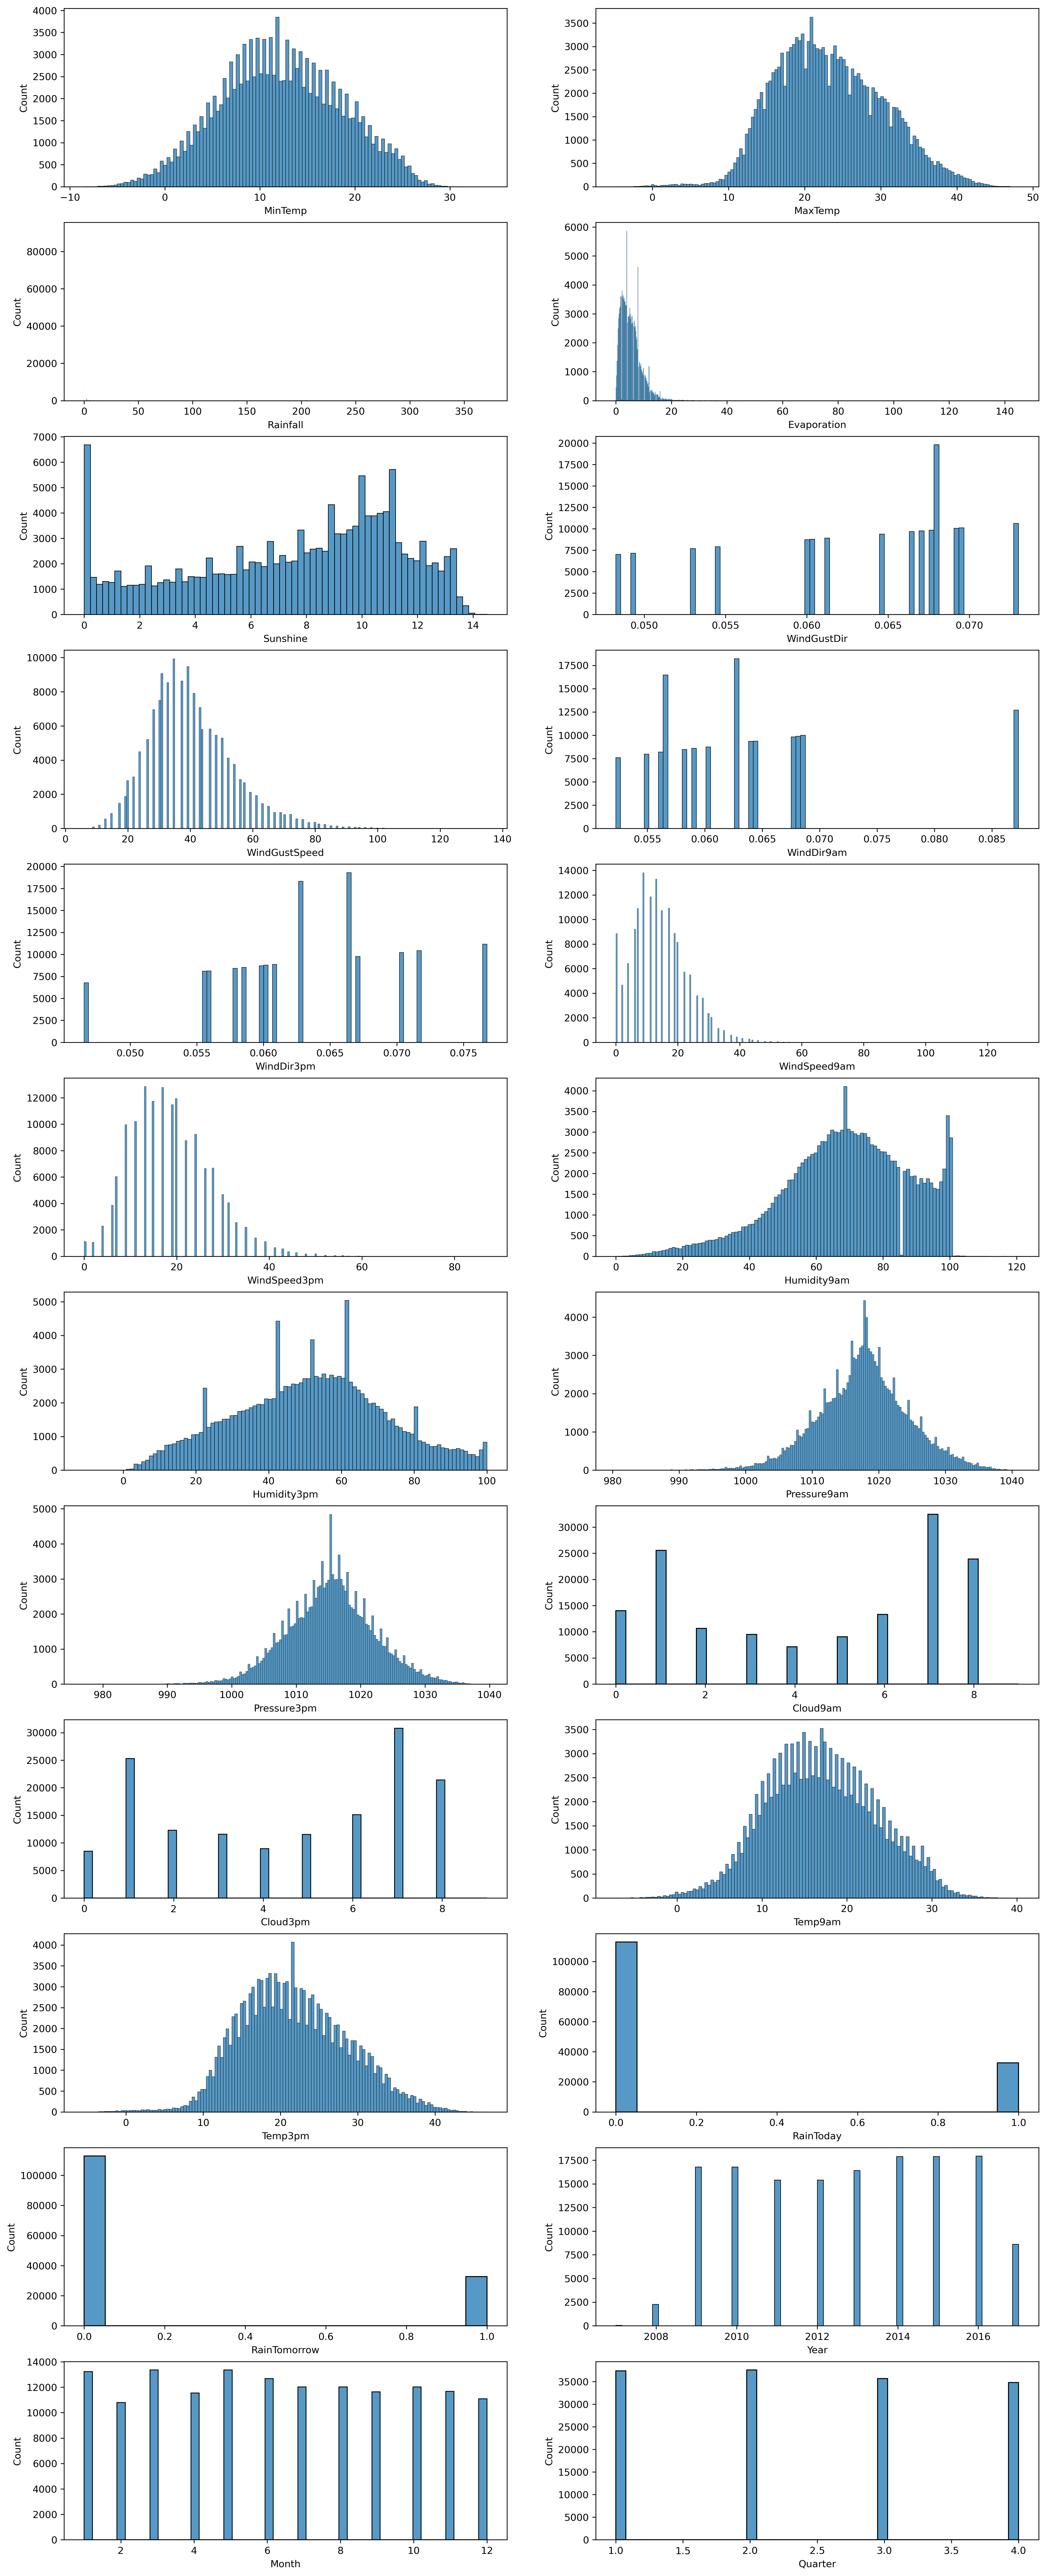

In [28]:
fig, axes = plt.subplots(nrows=12,
                         ncols=2,
                         figsize=[18, 48],
                         dpi=300)
axes = axes.ravel()

for i in range(len(axes)):
    sns.histplot(x=data[data.loc[:, 'MinTemp':].columns[i]],
                 ax=axes[i])

plt.show()

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 3.5234150143864045] is not finite

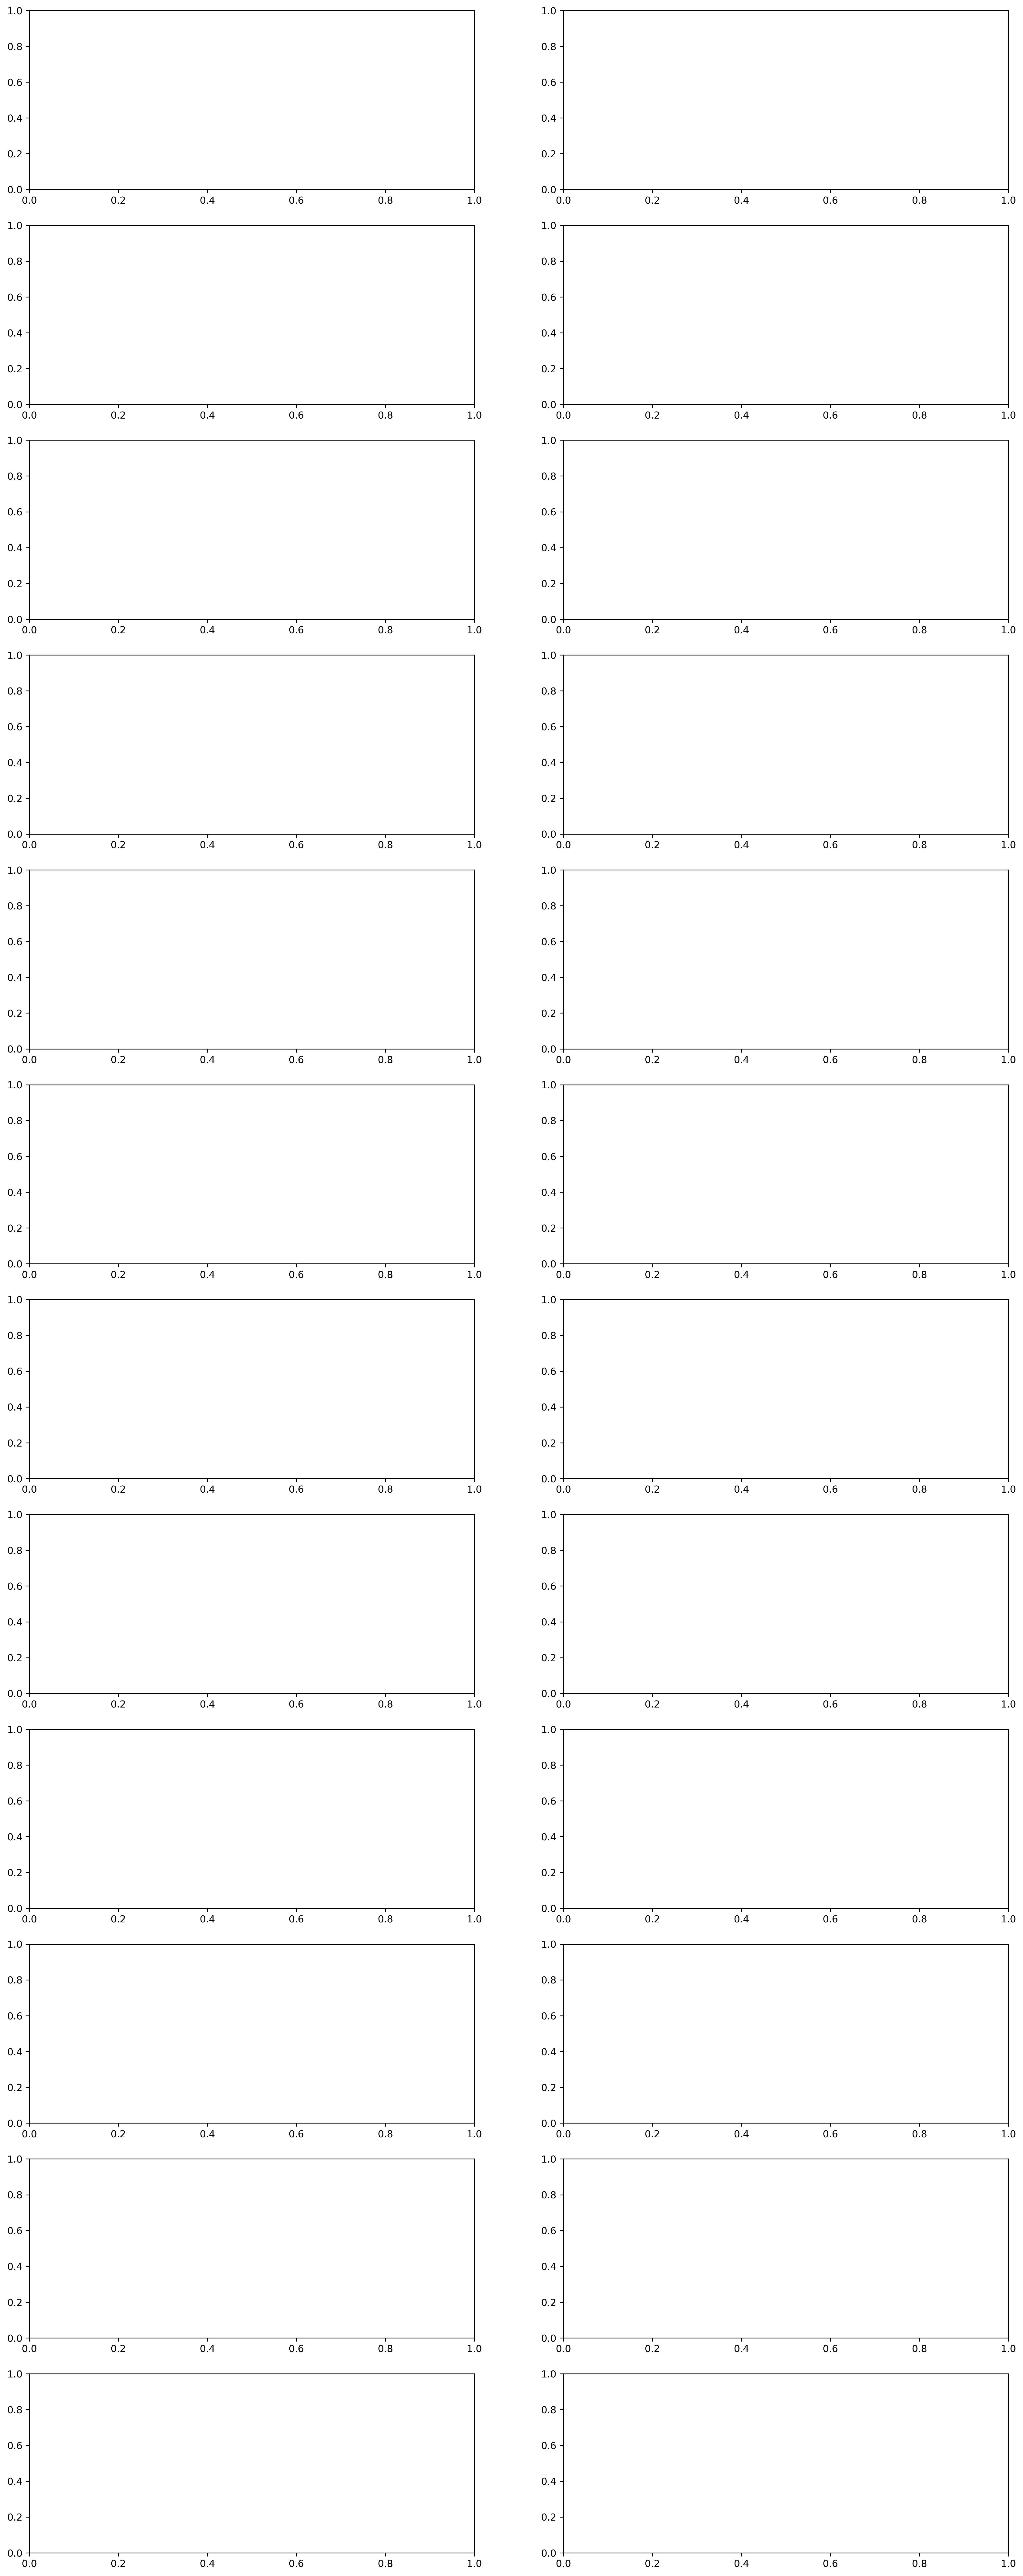